<a href="https://colab.research.google.com/github/gmihaila/machine_learning_toolbox/blob/master/catboost_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use CatBoost with GPUS:


https://catboost.ai/docs/features/training-on-gpu.html

## Short Example with Dummy data

In [0]:
!pip install catboost

    100% |████████████████████████████████| 55.5MB 828kB/s 


In [0]:
from catboost import CatBoostClassifier
import numpy as np
import gc
import time


train_data = np.random.rand(8000000,80)

train_labels = np.random.randint(2, size=8000000)

model = None
del model
gc.collect()

start = time.time()
model = CatBoostClassifier(task_type = "GPU")
model.fit(train_data, train_labels, verbose = False)
end = time.time()

In [0]:
print('CPU: ',(end - start))

CPU:  102.83633995056152


In [0]:
print('GPU: ',(end - start))

GPU:  396.0033543109894


## Long Example

In [0]:
# INSTALLS

from IPython.display import clear_output

# Install pydot
print("Installing graphiz and pydot")
!apt-get -qq install -y graphviz && pip install -q pydot
clear_output()

#Install non-standard packages (assuming jupyter notebook)
print("Installing shap")
!pip install shap
clear_output()

print("Installing lime")
!pip install lime
clear_output()

#eli5 package (https://eli5.readthedocs.io/en/latest)
print("Installing eli5")
!pip install eli5
clear_output()

print("Installing catboost")
!pip install catboost
clear_output()

print("Installing ipywidgets")
!pip install ipywidgets
clear_output()

print("Downloading pima-indians-diabetes")
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
clear_output()

!ls

catboost_info  pima-indians-diabetes.data.csv  sample_data


In [0]:
import time
import numpy as np
import pandas as pd

from catboost import CatBoostClassifier, Pool, cv

#scikit-learn package (https://pypi.org/project/scikit-learn)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split #TAKES NUMPY OR DATA FRAME!!
from sklearn.metrics.scorer import make_scorer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

import eli5
from eli5.sklearn import PermutationImportance

import itertools


#eli5 package (https://eli5.readthedocs.io/en/latest)
import eli5
from eli5.sklearn import PermutationImportance

#lime package (https://github.com/marcotcr/lime)
import lime
import lime.lime_tabular

#shap package (https://github.com/slundberg/shap)
import shap

#Split train and test set.
RANDOM_STATE = 123

# Parse data
path_file = 'pima-indians-diabetes.data.csv'

df = pd.read_csv(path_file, header=None)

x_df = df.drop(df.columns[8],axis=1)
y_df = df[df.columns[8]]

df.head()



# Parse data
# path_file = 'BayesianNetworkGenerator_breast-cancer_small.csv'

# df = pd.read_csv(path_file, header=None)

# x_df = df.drop(df.columns[9],axis=1)
# y_df = df[df.columns[9]]


# df.head()


# X, X_test, y, y_test = train_test_split(x_df, y_df, train_size=0.90, random_state=42)
# X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=RANDOM_STATE)


# print("Train: ", X_train.shape[0])
# print("Validation: ",X_validation.shape[0])
# print("Test: ",X_test.shape[0])


# x_tr = pd.get_dummies(X_train)
# y_tr = [1 if a == 'no-recurrence-events' else 0 for a in y_train]

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
categorical_features_indices = np.where(x_df.dtypes != np.float)[0];
categorical_features_indices

array([0, 1, 2, 3, 4, 7])

In [0]:
X, X_test, y, y_test = train_test_split(x_df, y_df, train_size=0.85, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=RANDOM_STATE)


print("Train: ", X_train.shape[0])
print("Validation: ",X_validation.shape[0])
print("Test: ",X_test.shape[0])

Train:  554
Validation:  98
Test:  116


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
# CatBoost

model = None
del model


model = CatBoostClassifier(
#     task_type = "GPU",
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

# https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostregressor_fit-docpage/

start = time.time()
model.fit(X, y,
          cat_features=categorical_features_indices,
          eval_set=(X_validation, y_validation),
          logging_level='Verbose',  # you can uncomment this for text output)
          plot=True)

end = time.time()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.074601
0:	learn: 0.6664772	test: 0.6598225	best: 0.6598225 (0)	total: 67.1ms	remaining: 1m 7s
1:	learn: 0.6462060	test: 0.6309224	best: 0.6309224 (1)	total: 111ms	remaining: 55.3s
2:	learn: 0.6386246	test: 0.6155197	best: 0.6155197 (2)	total: 152ms	remaining: 50.6s
3:	learn: 0.6343802	test: 0.6091950	best: 0.6091950 (3)	total: 161ms	remaining: 40s
4:	learn: 0.6190196	test: 0.5875192	best: 0.5875192 (4)	total: 176ms	remaining: 35s
5:	learn: 0.6060060	test: 0.5688370	best: 0.5688370 (5)	total: 193ms	remaining: 32s
6:	learn: 0.5991120	test: 0.5557620	best: 0.5557620 (6)	total: 207ms	remaining: 29.4s
7:	learn: 0.5866093	test: 0.5413014	best: 0.5413014 (7)	total: 226ms	remaining: 28s
8:	learn: 0.5793598	test: 0.5342297	best: 0.5342297 (8)	total: 243ms	remaining: 26.8s
9:	learn: 0.5689314	test: 0.5234456	best: 0.5234456 (9)	total: 258ms	remaining: 25.6s
10:	learn: 0.5604790	test: 0.5162653	best: 0.5162653 (10)	total: 273ms	remaining: 24.6s
11:	learn: 0.5534681	test: 0.

In [0]:
print(end - start)

23.301390647888184


In [0]:
print(end - start)

66.66963219642639


In [0]:
# Model Evaluation using Cross validation

cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    logging_level='Verbose', 
    plot=True
)

print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6877197	test: 0.6885466	best: 0.6885466 (0)
1:	learn: 0.6836672	test: 0.6858547	best: 0.6858547 (1)
2:	learn: 0.6796547	test: 0.6826562	best: 0.6826562 (2)
3:	learn: 0.6756115	test: 0.6798279	best: 0.6798279 (3)
4:	learn: 0.6707369	test: 0.6754915	best: 0.6754915 (4)
5:	learn: 0.6660944	test: 0.6711549	best: 0.6711549 (5)
6:	learn: 0.6608529	test: 0.6667357	best: 0.6667357 (6)
7:	learn: 0.6568277	test: 0.6632553	best: 0.6632553 (7)
8:	learn: 0.6531329	test: 0.6603302	best: 0.6603302 (8)
9:	learn: 0.6503118	test: 0.6575187	best: 0.6575187 (9)
10:	learn: 0.6469771	test: 0.6550033	best: 0.6550033 (10)
11:	learn: 0.6434668	test: 0.6516829	best: 0.6516829 (11)
12:	learn: 0.6390280	test: 0.6484890	best: 0.6484890 (12)
13:	learn: 0.6363431	test: 0.6463419	best: 0.6463419 (13)
14:	learn: 0.6327999	test: 0.6436173	best: 0.6436173 (14)
15:	learn: 0.6294015	test: 0.6410232	best: 0.6410232 (15)
16:	learn: 0.6264663	test: 0.6383857	best: 0.6383857 (16)
17:	learn: 0.6228427	test: 0.63567

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [0]:
# Get predictions
y_predict = model.predict(X_test)

# Probability of malignant tissue produced by the model
y_prob = [probs[1] for probs in model.predict_proba(X_test)]

In [0]:
#Accuracy on test set
print("Test accuracy: %s"%(accuracy_score(y_test, y_predict).round(2)))

# Confusion matrix test set
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted NO', 'Predicted YES'],
    index=['Actual NO', 'Actual YES']
)

Test accuracy: 0.66


,Predicted NO,Predicted YES
Actual NO,51,25
Actual YES,14,26


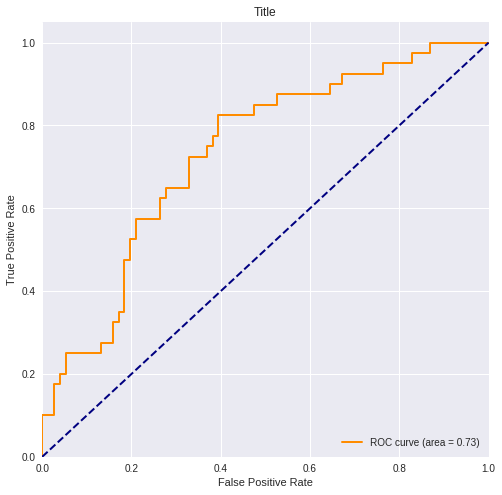

In [0]:
# Compute area under the curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Set default figure size
plt.rcParams['figure.figsize'] = (8,8)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Title")
plt.legend(loc="lower right")
plt.show()

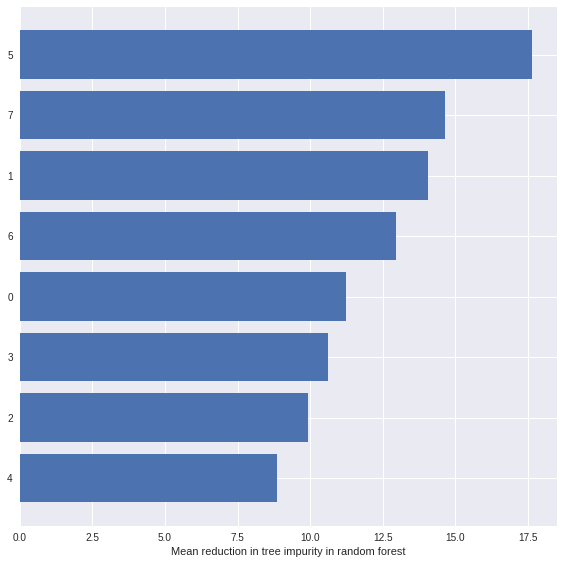

In [0]:
# Feature importance dataframe
imp_df = pd.DataFrame({'feature': X_train.columns.values,
                       'importance': model.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)
 
## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Mean reduction in tree impurity in random forest")

plt.tight_layout()
# Show graphic
plt.show()


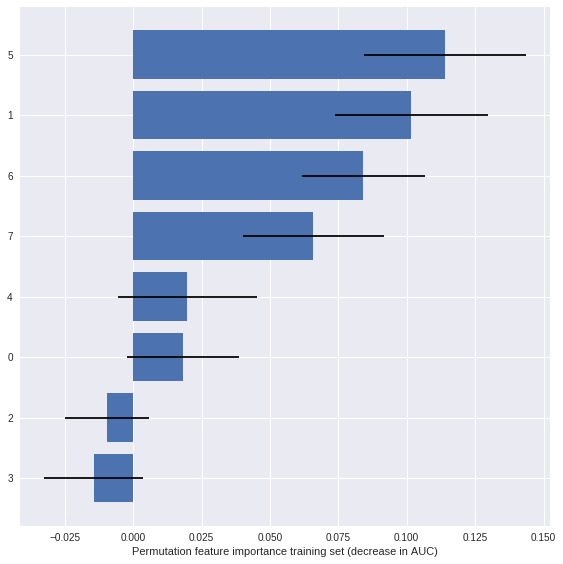

In [0]:
# Feature importance based on TRAINING set

perm_test = PermutationImportance(model, scoring=make_scorer(roc_auc_score),
                                   n_iter=50, random_state=RANDOM_STATE, cv="prefit")

# fit and see the permuation importances
perm_test.fit(X_train, y_train)

imp_df = eli5.explain_weights_df(perm_test)
label_df = pd.DataFrame({'feature': [ "x" + str(i) for i in range(len(X_test.columns))], 'feature_name': X_test.columns.values})
imp_df = pd.merge(label_df, imp_df, on='feature', how='inner', validate="one_to_one")
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='weight')
imp_range=range(1,len(imp_df.index)+1)
 

## Barplot with confidence intervals

height = ordered_df['weight']
bars = ordered_df['feature_name']
ci = 1.96 * ordered_df['std']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height, xerr=ci)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Permutation feature importance training set (decrease in AUC)")
plt.tight_layout()

# Show graphic
plt.show()
